#1.Importing the necessary libraries


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#2.Loading the data


In [52]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

#3.Exploring the data


In [53]:
df_train.head()


,ID,title,text,subject,date,class
0,0.0,#AfterTrumpImplodes Hashtag Hilariously Imagi...,What will the world be like post-Donald Trump?...,News,5-Aug-16,0.0
1,1.0,#BlackLivesMatter Leader To Run For Mayor Of ...,The police shooting of black teen Michael Brow...,News,4-Feb-16,0.0
2,2.0,#BringBackObama Hashtag Blows Up On Twitter A...,The six months since President Donald Trump wa...,News,13-Jul-17,0.0
3,3.0,#FreeChrisChristie: Twitter Reacts To The ‘Ho...,"Last Friday, New Jersey Governor Chris Christi...",News,2-Mar-16,0.0
4,4.0,#MakeAmericaBrannigan: Futurama Voice Actor R...,"The incredibly talented voice actor, Billy Wes...",News,13-Aug-16,0.0


In [54]:
df_train.describe().round(2)


,ID,class
count,40406.00,40414.00
mean,20202.50,0.47
std,11664.35,0.50
min,0.00,0.00
25%,10101.25,0.00
50%,20202.50,0.00
75%,30303.75,1.00
max,40405.00,1.00


In [55]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44919 entries, 0 to 44918
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       40406 non-null  float64
 1   title    40427 non-null  object 
 2   text     40427 non-null  object 
 3   subject  40414 non-null  object 
 4   date     40414 non-null  object 
 5   class    40414 non-null  float64
dtypes: float64(2), object(4)
memory usage: 2.1+ MB


In [56]:
df_train.shape

(44919, 6)

In [57]:
df_train['subject'].unique()


array(['News',
       ' claimed that hundreds of alternative media websites were producing  fake news  and  conspiracy  stories and therefore were unreliable as information sources. It wasn t long before the establishment began referencing these politicized lists',
       'politicsNews', 'worldnews', 'politics', 'left-news', 'US_News',
       'Middle-east', 'Government News', nan,
       ' Karl Marx is either a villain or a hero of social engineering',
       ' a future nuclear family',
       ' state systems with outsized pretensions to power have reacted to their environments in two ways. The first strategy',
       ' of which Soros is a major financier.Mercy Corps: Vis a vis the Arab-Israeli conflict',
       ' the defense industry', ' and so is Mr. Katzenbach',
       ' Politics According to the Bible and (with Barry Asmus) The Poverty of Nations: A Sustainable Solution.Via: Townhall"',
       ' high taxes',
       ' fell 5.6 percent Monday. Wynn Resortsslipped 1.2 percent. Las Veg

In [58]:
df_test['subject'].unique()


array(['politicsNews', 'worldnews', 'Government News', 'left-news',
       'politics', 'US_News', 'Middle-east', 'News',
       ' decided not to seek re-election. While much of the mainstream media waxed poetic about his 30-year career'],
      dtype=object)

#4.Preprocessing the data


##4.1. Handling duplicates


In [59]:
# Check for duplicates
duplicated_rows = df_train[df_train.duplicated()]
print(duplicated_rows)

       ID title text subject date  class
40428 NaN   NaN  NaN     NaN  NaN    NaN
40429 NaN   NaN  NaN     NaN  NaN    NaN
40430 NaN   NaN  NaN     NaN  NaN    NaN
40431 NaN   NaN  NaN     NaN  NaN    NaN
40432 NaN   NaN  NaN     NaN  NaN    NaN
...    ..   ...  ...     ...  ...    ...
44914 NaN   NaN  NaN     NaN  NaN    NaN
44915 NaN   NaN  NaN     NaN  NaN    NaN
44916 NaN   NaN  NaN     NaN  NaN    NaN
44917 NaN   NaN  NaN     NaN  NaN    NaN
44918 NaN   NaN  NaN     NaN  NaN    NaN

[4491 rows x 6 columns]


In [60]:
# drop duplicates
df_train = df_train.drop_duplicates()

##4.2. Handling missing values


In [61]:
df_train.isnull().sum()

ID         22
title       1
text        1
subject    14
date       14
class      14
dtype: int64

In [62]:
df_test.isnull().sum()

ID         0
title      0
text       0
subject    0
date       0
dtype: int64

###4.2.1. All the row with missing values


In [63]:
# If the a row is missing all the columns, we can drop it
df_train.dropna(how='all')
print(df_train.isnull().sum())

ID         22
title       1
text        1
subject    14
date       14
class      14
dtype: int64


In [64]:
df_train.shape

(40428, 6)

###4.2.2. class


In [65]:
# drop rows with missing values in the target column
df_train = df_train.dropna(subset=['class'])
print(df_train.isnull().sum())

ID         21
title       0
text        0
subject     0
date        0
class       0
dtype: int64


###4.2.3. ID


In [66]:
# filling the ID column with the value of the index
df_train['ID'] = df_train.index
print(df_train.isnull().sum())

ID         0
title      0
text       0
subject    0
date       0
class      0
dtype: int64


##4.3 Handling date data


In [67]:
# Date will not be useful for the model, so we can drop it as the date of the new won't determine if the new is fake or not
df_train = df_train.drop(columns=['date'])
df_test = df_test.drop(columns=['date'])

##4.4. Saving the preprocessed data


In [68]:
"""# save the cleaned data
df_train.to_csv('preprocessed_data/train_cleaned.csv', index=False)
df_test.to_csv('preprocessed_data/test_cleaned.csv', index=False)"""

"# save the cleaned data\ndf_train.to_csv('preprocessed_data/train_cleaned.csv', index=False)\ndf_test.to_csv('preprocessed_data/test_cleaned.csv', index=False)"

#5.Handling Outliers

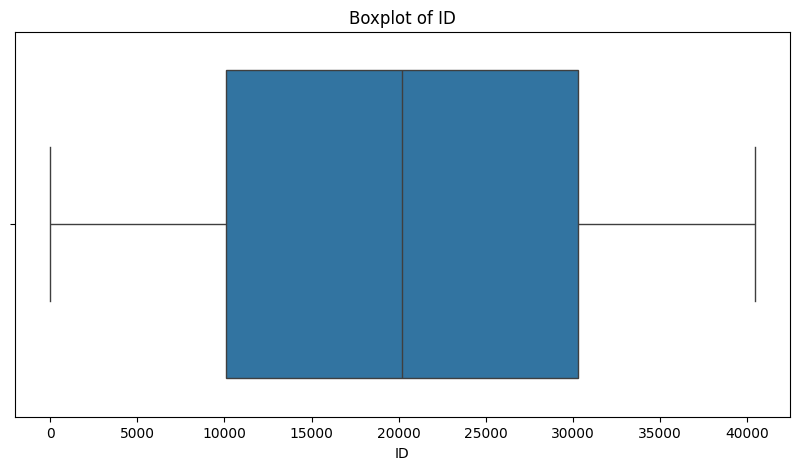

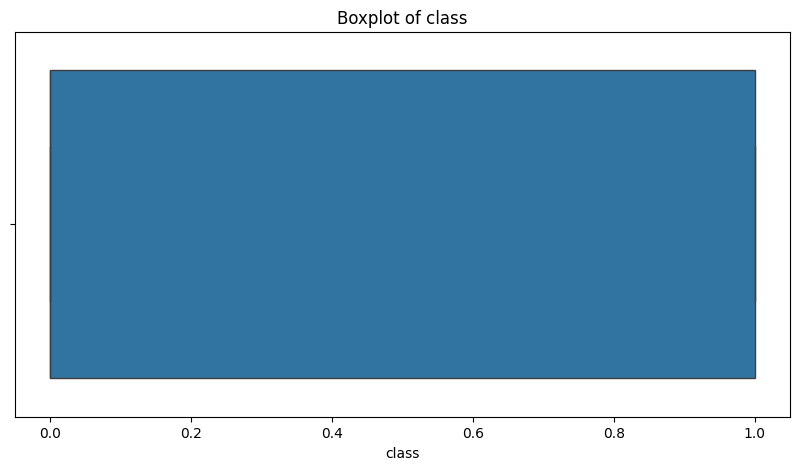

In [69]:
for col in df_train.columns:
    if df_train[col].dtype != 'object':
        fig, ax = plt.subplots(figsize=(10, 5))
        ax.set_title(f'Boxplot of {col}')
        boxplot = sns.boxplot(data = df_train, x = col)
        plt.show()

//no outliers

#6.text and title Columns preprocessing

In [70]:
df_train.head()

,ID,title,text,subject,class
0,0,#AfterTrumpImplodes Hashtag Hilariously Imagi...,What will the world be like post-Donald Trump?...,News,0.0
1,1,#BlackLivesMatter Leader To Run For Mayor Of ...,The police shooting of black teen Michael Brow...,News,0.0
2,2,#BringBackObama Hashtag Blows Up On Twitter A...,The six months since President Donald Trump wa...,News,0.0
3,3,#FreeChrisChristie: Twitter Reacts To The ‘Ho...,"Last Friday, New Jersey Governor Chris Christi...",News,0.0
4,4,#MakeAmericaBrannigan: Futurama Voice Actor R...,"The incredibly talented voice actor, Billy Wes...",News,0.0


In [71]:
df_train.shape

(40414, 5)

In [72]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re


In [73]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [74]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [75]:
df_train['title'] = df_train['title'].str.lower()
df_train['text'] = df_train['text'].str.lower()
df_train['subject']=df_train['subject'].str.lower()

In [76]:
df_train.head()

,ID,title,text,subject,class
0,0,#aftertrumpimplodes hashtag hilariously imagi...,what will the world be like post-donald trump?...,news,0.0
1,1,#blacklivesmatter leader to run for mayor of ...,the police shooting of black teen michael brow...,news,0.0
2,2,#bringbackobama hashtag blows up on twitter a...,the six months since president donald trump wa...,news,0.0
3,3,#freechrischristie: twitter reacts to the ‘ho...,"last friday, new jersey governor chris christi...",news,0.0
4,4,#makeamericabrannigan: futurama voice actor r...,"the incredibly talented voice actor, billy wes...",news,0.0


In [77]:
df_test['title'] = df_test['title'].str.lower()
df_test['text'] = df_test['text'].str.lower()
df_test['subject']=df_test['subject'].str.lower()

In [78]:
df_test.head()

,ID,title,text,subject
0,1,u.s. judge presses trump administration on dre...,new york (reuters) - a u.s. judge on thursday ...,politicsnews
1,2,u.s. judge questions government on trump's lat...,"greenbelt, md. (reuters) - a u.s. judge on mon...",politicsnews
2,3,u.s. judge questions states seeking to restore...,san francisco (reuters) - a u.s. judge on mond...,politicsnews
3,4,u.s. judge refuses to halt new york nuclear po...,new york (reuters) - a federal judge on tuesda...,politicsnews
4,5,u.s. judge rejects bid to dismiss indonesian i...,boston (reuters) - a federal judge on wednesda...,worldnews


In [79]:
for index, row in df_train.iterrows():
     df_train.at[index, 'title'] = re.sub('[^a-zA-Z]+', ' ', str(row['title']))
     df_train.at[index, 'text'] = re.sub('[^a-zA-Z]+', ' ', str(row['text']))
     df_train.at[index, 'subject'] = re.sub('[^a-zA-Z]+', ' ', str(row['subject']))

In [80]:
df_train.head()

,ID,title,text,subject,class
0,0,aftertrumpimplodes hashtag hilariously imagin...,what will the world be like post donald trump ...,news,0.0
1,1,blacklivesmatter leader to run for mayor of r...,the police shooting of black teen michael brow...,news,0.0
2,2,bringbackobama hashtag blows up on twitter as...,the six months since president donald trump wa...,news,0.0
3,3,freechrischristie twitter reacts to the hosta...,last friday new jersey governor chris christie...,news,0.0
4,4,makeamericabrannigan futurama voice actor rea...,the incredibly talented voice actor billy west...,news,0.0


In [81]:
for index, row in df_test.iterrows():
     df_test.at[index, 'title'] = re.sub('[^a-zA-Z]+', ' ', str(row['title']))
     df_test.at[index, 'text'] = re.sub('[^a-zA-Z]+', ' ', str(row['text']))
     df_test.at[index, 'subject'] = re.sub('[^a-zA-Z]+', ' ', str(row['subject']))

In [82]:
df_test.head()

,ID,title,text,subject
0,1,u s judge presses trump administration on drea...,new york reuters a u s judge on thursday repea...,politicsnews
1,2,u s judge questions government on trump s late...,greenbelt md reuters a u s judge on monday que...,politicsnews
2,3,u s judge questions states seeking to restore ...,san francisco reuters a u s judge on monday ap...,politicsnews
3,4,u s judge refuses to halt new york nuclear pow...,new york reuters a federal judge on tuesday di...,politicsnews
4,5,u s judge rejects bid to dismiss indonesian im...,boston reuters a federal judge on wednesday de...,worldnews


In [83]:
def remove_Stop_words_And_Apply_lemmatization(title):
    tokens = title.split()
    processed_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    processed_title = " ".join(processed_tokens)
    return processed_title



In [84]:
df_train['title'] = df_train['title'].apply(remove_Stop_words_And_Apply_lemmatization)
df_train['text'] = df_train['text'].apply(remove_Stop_words_And_Apply_lemmatization)
df_train['subject'] = df_train['subject'].apply(remove_Stop_words_And_Apply_lemmatization)

In [85]:
df_test['title'] = df_test['title'].apply(remove_Stop_words_And_Apply_lemmatization)
df_test['text'] = df_test['text'].apply(remove_Stop_words_And_Apply_lemmatization)
df_test['subject'] = df_test['subject'].apply(remove_Stop_words_And_Apply_lemmatization)


In [86]:
df_test.head()

,ID,title,text,subject
0,1,u judge press trump administration dreamer dea...,new york reuters u judge thursday repeatedly p...,politicsnews
1,2,u judge question government trump latest trave...,greenbelt md reuters u judge monday questioned...,politicsnews
2,3,u judge question state seeking restore obamaca...,san francisco reuters u judge monday appeared ...,politicsnews
3,4,u judge refuse halt new york nuclear power pla...,new york reuters federal judge tuesday dismiss...,politicsnews
4,5,u judge reject bid dismiss indonesian immigran...,boston reuters federal judge wednesday decline...,worldnews


In [87]:
X = df_train['text']
y = df_train["class"]

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,stratify=y, random_state = 42)

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()


In [90]:
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [91]:
# from sklearn.linear_model import LogisticRegression

In [92]:
# classify = LogisticRegression(random_state = 0)
# classify.fit(X_train_tfidf,y_train)

In [93]:
from sklearn.svm import SVC
SVM = SVC(kernel='linear')
SVM.fit(X_train_tfidf,y_train)


SVC(kernel='linear')

In [94]:
X_train_tfidf.shape

(32331, 93540)

In [95]:
y_pred = SVM.predict(X_test_tfidf)

In [96]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9930718792527526

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      4254
         1.0       0.99      1.00      0.99      3829

    accuracy                           0.99      8083
   macro avg       0.99      0.99      0.99      8083
weighted avg       0.99      0.99      0.99      8083



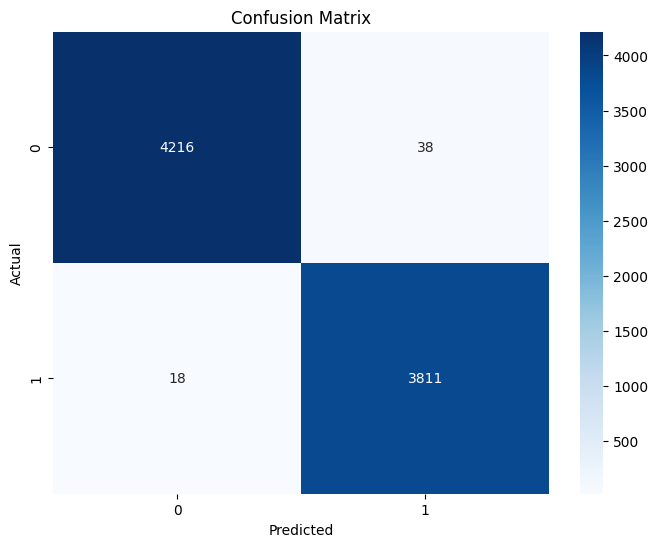

In [97]:
cmDisplay= confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cmDisplay, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [98]:
X_test = df_test['text'].values

X_test = tfidf.transform(X_test)

y_pred = SVM.predict(X_test)

df_test['class'] = y_pred

In [99]:
df_test_predicted = df_test.drop(columns=['subject', 'title', 'text'])

In [101]:
df_test_predicted.to_csv('test_preprocessed.csv',index=False)